In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError
from tensorflow.keras.metrics import mean_squared_error,mean_absolute_error

In [2]:
data_df = pd.read_csv("laptops.csv")
data_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
data_df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
data_df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

## Treating missing values

In [6]:
data_df["Storage type"].value_counts()

SSD     2062
eMMC      56
Name: Storage type, dtype: int64

In [7]:
data_df["Storage type"].fillna(data_df["Storage type"].mode()[0],inplace=True)

In [8]:
data_df["GPU"].value_counts()

RTX 3050              129
RTX 3060              122
RTX 3070               97
RTX 4060               62
RTX 3080               51
GTX 1650               50
RTX 4070               40
RTX 4050               33
RTX 2070               25
RTX 2060               20
RTX 4080               18
RTX 4090               17
GTX 1660               14
RTX 2050               11
Radeon Pro 5500M        9
RTX A2000               8
RTX 2080                7
MX 450                  7
RTX A3000               7
RTX A1000               6
T 1200                  6
MX 550                  5
MX 330                  5
T 500                   5
T 550                   4
GTX 1050                3
Radeon Pro RX 560X      3
RTX A5500               3
RX 6500M                3
RX 7600S                2
T 600                   2
Radeon Pro 5300M        2
610 M                   2
RX 6700M                1
P 500                   1
MX 130                  1
A 370M                  1
RX 6800S                1
T 2000      

In [9]:
data_df["GPU"].fillna(data_df["GPU"].mode()[0],inplace=True)

In [10]:
data_df["Screen"].value_counts()

15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.50      19
13.40      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
12.00       4
18.00       3
14.50       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: Screen, dtype: int64

In [11]:
data_df["Screen"].fillna(data_df["Screen"].mode()[0],inplace=True)

In [12]:
data_df.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

### All the missing values are treated now

In [13]:
data_df["Brand Model"] = data_df["Brand"] + "_" + data_df["Model"]

In [14]:
data_df["Status"].unique()

array(['New', 'Refurbished'], dtype=object)

In [15]:
data_df["Touch"].unique()

array(['No', 'Yes'], dtype=object)

## Encoding

In [16]:
status_encode = {"New":1, "Refurbished":0}
touch_encode = {"No":0, "Yes":1}
Storage_type_encode = {"SSD":1, "eMMC":0}

data_df["Status"] = data_df["Status"].map(status_encode)
data_df["Touch"] = data_df["Touch"].map(touch_encode)
data_df["Storage type"]= data_df["Storage type"].map(Storage_type_encode)

In [17]:
data_df["GPU"].value_counts()

RTX 3050              1500
RTX 3060               122
RTX 3070                97
RTX 4060                62
RTX 3080                51
GTX 1650                50
RTX 4070                40
RTX 4050                33
RTX 2070                25
RTX 2060                20
RTX 4080                18
RTX 4090                17
GTX 1660                14
RTX 2050                11
Radeon Pro 5500M         9
RTX A2000                8
RTX 2080                 7
MX 450                   7
RTX A3000                7
RTX A1000                6
T 1200                   6
MX 550                   5
MX 330                   5
T 500                    5
T 550                    4
GTX 1050                 3
Radeon Pro RX 560X       3
RTX A5500                3
RX 6500M                 3
RX 7600S                 2
T 600                    2
Radeon Pro 5300M         2
610 M                    2
RX 6700M                 1
P 500                    1
MX 130                   1
A 370M                   1
R

In [18]:
"RTX 3050".split()[0]

'RTX'

In [19]:
data_df['GPU_brand'] = data_df['GPU'].apply(lambda x:x.split()[0])

In [20]:
data_df["CPU_brand"] = data_df['CPU'].apply(lambda x:x.split()[0])

In [21]:
data_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,Brand Model,GPU_brand,CPU_brand
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,1,Asus,ExpertBook,Intel Core i5,8,512,1,RTX 3050,15.6,0,1009.00,Asus_ExpertBook,RTX,Intel
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,1,Alurin,Go,Intel Celeron,8,256,1,RTX 3050,15.6,0,299.00,Alurin_Go,RTX,Intel
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,1,Asus,ExpertBook,Intel Core i3,8,256,1,RTX 3050,15.6,0,789.00,Asus_ExpertBook,RTX,Intel
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,1,MSI,Katana,Intel Core i7,16,1000,1,RTX 3050,15.6,0,1199.00,MSI_Katana,RTX,Intel
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,1,HP,15S,Intel Core i5,16,512,1,RTX 3050,15.6,0,669.01,HP_15S,RTX,Intel


<AxesSubplot:xlabel='GPU_brand', ylabel='Final Price'>

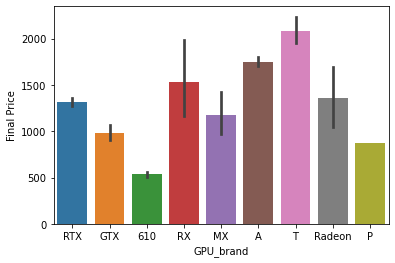

In [22]:
sns.barplot(x=data_df['GPU_brand'],y=data_df['Final Price'])

In [23]:
data_df["GPU_brand"].value_counts()

RTX       2028
GTX         68
T           19
MX          18
Radeon      15
RX           7
610          2
A            2
P            1
Name: GPU_brand, dtype: int64

In [24]:
#we shall remove the 5 rows corresponding to 610, A, P brands

gpu_index = data_df[(data_df["GPU_brand"]== "610") | (data_df["GPU_brand"]== "A") | (data_df["GPU_brand"]== "P")].index

In [25]:
data_df.drop(gpu_index,axis=0,inplace= True)

In [26]:
len(data_df)

2155

In [27]:
data_df["CPU_brand"].value_counts()

Intel        1688
AMD           399
Apple          59
Qualcomm        5
Microsoft       3
Mediatek        1
Name: CPU_brand, dtype: int64

In [28]:
cpu_index = data_df[data_df["CPU_brand"]=="Mediatek"].index
data_df.drop(cpu_index,axis=0,inplace= True)

In [29]:
len(data_df)

2154

In [30]:
data_df.reset_index(inplace=True)
data_df.drop(["index"],axis=1,inplace=True)

## Binning the continuous variables

In [31]:
ram_labels=['less_than_10GB','12_to_32GB','40_to_128GB']
ram_bins=[3, 8, 32,128]

data_df['RAM_category'] = pd.cut(data_df['RAM'],bins=ram_bins,labels=ram_labels)
data_df['RAM_category'] = data_df["RAM_category"].astype('object')

In [32]:
storage_labels=['less_than_100','100_to_500','500_to_1000','2000','3000','4000']
storage_bins=[-1,100,500,1000,2000,3000,5000]

data_df["Storage_category"] = pd.cut(data_df["Storage"],bins = storage_bins,labels = storage_labels)
data_df['Storage_category'] = data_df["Storage_category"].astype('object')

In [33]:
screen_labels=['10_to_12','12_to_14','14_to_16','16_to_18']
screen_bins=[9,12,14,16,18]

data_df["Screen_category"] = pd.cut(data_df["Screen"],bins = screen_bins,labels = screen_labels)
data_df["Screen_category"] = data_df["Screen_category"].astype('object')

In [34]:
## Encode the binned variables
ram_encode = {'less_than_10GB':0,'12_to_32GB':1,'40_to_128GB':2}
storage_encode = {'less_than_100':0,'100_to_500':1,'500_to_1000':2,'2000':3,'3000':4,'4000':5}
screen_encode = {'10_to_12':0,'12_to_14':1,'14_to_16':2,'16_to_18':3}


data_df["RAM_category"] = data_df["RAM_category"].map(ram_encode)
data_df["Storage_category"] = data_df["Storage_category"].map(storage_encode)
data_df["Screen_category"]= data_df["Screen_category"].map(screen_encode)

<AxesSubplot:xlabel='RAM_category', ylabel='Final Price'>

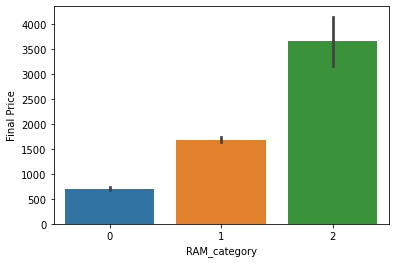

In [35]:
sns.barplot(x=data_df['RAM_category'],y=data_df['Final Price'])

<AxesSubplot:xlabel='Screen_category', ylabel='Final Price'>

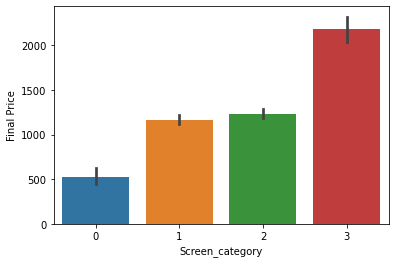

In [36]:
sns.barplot(x=data_df['Screen_category'],y=data_df['Final Price'])

<AxesSubplot:xlabel='Storage_category', ylabel='Final Price'>

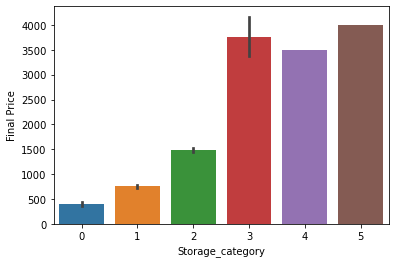

In [37]:
sns.barplot(x=data_df['Storage_category'],y=data_df['Final Price'])

In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Laptop            2154 non-null   object 
 1   Status            2154 non-null   int64  
 2   Brand             2154 non-null   object 
 3   Model             2154 non-null   object 
 4   CPU               2154 non-null   object 
 5   RAM               2154 non-null   int64  
 6   Storage           2154 non-null   int64  
 7   Storage type      2154 non-null   int64  
 8   GPU               2154 non-null   object 
 9   Screen            2154 non-null   float64
 10  Touch             2154 non-null   int64  
 11  Final Price       2154 non-null   float64
 12  Brand Model       2154 non-null   object 
 13  GPU_brand         2154 non-null   object 
 14  CPU_brand         2154 non-null   object 
 15  RAM_category      2154 non-null   int64  
 16  Storage_category  2154 non-null   int64  


In [39]:
data_df["Brand Model"].unique()

array(['Asus_ExpertBook', 'Alurin_Go', 'MSI_Katana', 'HP_15S',
       'MSI_Crosshair', 'Lenovo_ThinkPad', 'Asus_VivoBook',
       'Medion_Akoya', 'HP_Victus', 'Lenovo_V15', 'MSI_Thin', 'Asus_ROG',
       'Lenovo_IdeaPad', 'MSI_Cyborg', 'Asus_M515UA', 'Asus_TUF',
       'Acer_Aspire', 'HP_Pavilion', 'MSI_Vector', 'Asus_Chromebook',
       'HP_Omen', 'Asus_ZenBook', 'MSI_Creator', 'Apple_MacBook Air',
       'Lenovo_ThinkBook', 'HP_250', 'MSI_Modern', 'HP_255',
       'Apple_MacBook Pro', 'MSI_Prestige', 'MSI_Stealth', 'MSI_Pulse',
       'Razer_Blade', 'Lenovo_Legion', 'MSI_Raider', 'HP_ProBook',
       'Asus_F515', 'Gigabyte_G5', 'HP_Chromebook', 'Dell_Vostro',
       'Acer_Nitro', 'LG_Gram', 'Asus_E410', 'Alurin_Flex Advance',
       'MSI_Bravo', 'Gigabyte_Aero', 'Lenovo_Yoga', 'Samsung_Galaxy Book',
       'Medion_Erazer', 'MSI_Summit', 'LG_Ultra', 'Acer_Extensa',
       'Alurin_Flex', 'HP_EliteBook', 'PcCom_Revolt', 'Dell_Latitude',
       'HP_Envy', 'Medion_Deputy', 'Acer_Predator'

C:\Users\nswet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


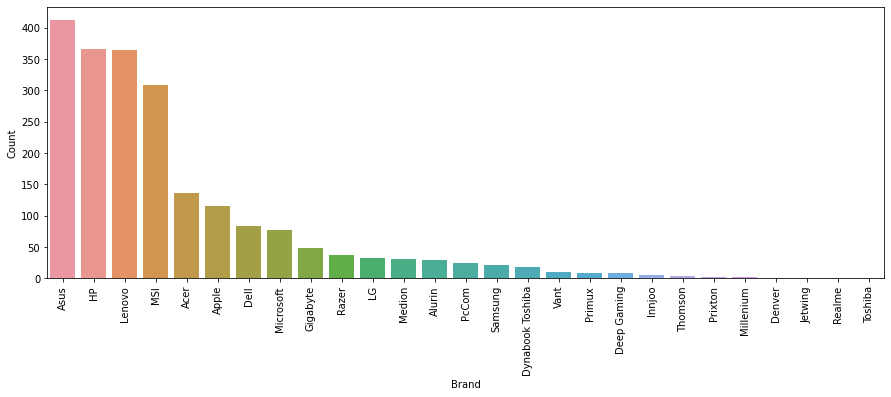

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(data_df['Brand'],order = data_df['Brand'].value_counts().index)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [41]:
#avg_price_of_each brand
avg_price_per_brand_df=data_df[['Brand','Final Price']].groupby(['Brand']).agg({'Final Price':['mean']})
avg_price_per_brand_df.columns=['avg_price_per_brand']
avg_price_per_brand_df=avg_price_per_brand_df.reset_index()
avg_price_per_brand_df.sort_values(by='avg_price_per_brand', ascending=False)

,Brand,avg_price_per_brand
21,Razer,3265.701622
17,Millenium,1976.845000
14,MSI,1913.451006
12,LG,1730.028438
8,Gigabyte,1698.488958
18,PcCom,1606.762917
16,Microsoft,1595.543247
23,Samsung,1595.511364
2,Apple,1578.227672
4,Deep Gaming,1505.377500


In [42]:
price_order=avg_price_per_brand_df.sort_values(by='avg_price_per_brand', ascending=False).Brand

<function matplotlib.pyplot.show(close=None, block=None)>

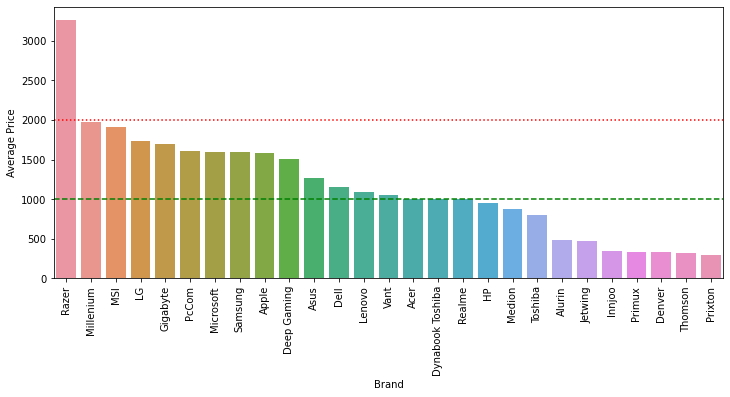

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(x='Brand',y='avg_price_per_brand',data=avg_price_per_brand_df,order=price_order)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.axhline(2000, color='red', ls='dotted')
plt.axhline(1000, color='green', ls='--')
plt.xticks(rotation=90)
plt.show

In [44]:
price_label=['Budget_friendly','Mid_Range','Expensive']
price_bins=[100,1000,2000,10000]
data_df['Brand_category']=pd.cut(data_df['Final Price'],bins=price_bins,labels=price_label)

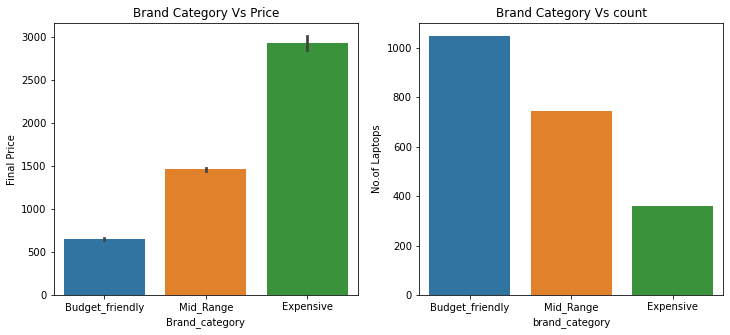

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x='Brand_category',y='Final Price',data=data_df,ax=ax1)
plt.xlabel('brand_category')
plt.ylabel('Price')
ax1.set_title('Brand Category Vs Price')


sns.countplot(x='Brand_category',data=data_df,ax=ax2)
plt.xlabel('brand_category')
plt.ylabel('No.of Laptops')
ax2.set_title('Brand Category Vs count')

plt.show()

In [46]:
Brand_type_encode = {"Budget_friendly":0, "Mid_Range":1, 'Expensive':2}
data_df["Brand_category"] = data_df["Brand_category"].map(Brand_type_encode)

In [47]:
ohe = OneHotEncoder()
ohe_encoded = ohe.fit_transform(data_df[['GPU_brand', 'CPU_brand']])

In [48]:
ohe_encoded.toarray()

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [49]:
ohe.get_feature_names_out()

array(['GPU_brand_GTX', 'GPU_brand_MX', 'GPU_brand_RTX', 'GPU_brand_RX',
       'GPU_brand_Radeon', 'GPU_brand_T', 'CPU_brand_AMD',
       'CPU_brand_Apple', 'CPU_brand_Intel', 'CPU_brand_Microsoft',
       'CPU_brand_Qualcomm'], dtype=object)

In [50]:
ohe_encoded_df = pd.DataFrame(ohe_encoded.toarray(),columns=ohe.get_feature_names_out())

In [51]:
ohe_encoded_df

,GPU_brand_GTX,GPU_brand_MX,GPU_brand_RTX,GPU_brand_RX,GPU_brand_Radeon,GPU_brand_T,CPU_brand_AMD,CPU_brand_Apple,CPU_brand_Intel,CPU_brand_Microsoft,CPU_brand_Qualcomm
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2150,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2152,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Remove unwanted columns

In [52]:
required_columns = ['Status', 'Storage type', 'Touch', 'Final Price','RAM_category',
                    'Storage_category','Screen_category','Brand_category']

In [53]:
final_df = pd.concat([data_df[required_columns],ohe_encoded_df],axis=1)

In [54]:
final_df

,Status,Storage type,Touch,Final Price,RAM_category,Storage_category,Screen_category,Brand_category,GPU_brand_GTX,GPU_brand_MX,GPU_brand_RTX,GPU_brand_RX,GPU_brand_Radeon,GPU_brand_T,CPU_brand_AMD,CPU_brand_Apple,CPU_brand_Intel,CPU_brand_Microsoft,CPU_brand_Qualcomm
0,1,1,0,1009.00,0,2,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0,299.00,0,1,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,789.00,0,1,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,0,1199.00,1,2,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0,669.01,1,2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,0,1,0,2699.99,1,2,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2150,0,1,0,2899.99,1,2,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2151,0,1,0,3399.99,1,2,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2152,0,1,1,1899.99,1,2,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
y = final_df.pop("Final Price")
X = final_df

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [57]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (1723, 18)
Shape of y_train (1723,)
Shape of X_test (431, 18)
Shape of y_test (431,)


In [58]:
### Build FNN model
fnn_model = Sequential()
fnn_model.add(Dense(input_dim=18,units=16, activation='relu'))
fnn_model.add(Dense(units=8, activation='relu'))
fnn_model.add(Dense(units=1, activation='linear'))

opt=Adam(1e-1)
fnn_model.compile(loss=MeanSquaredError(),  optimizer=opt , metrics=mean_squared_error)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [60]:
early_stop = EarlyStopping(monitor='val_loss',patience=10,verbose=1,restore_best_weights=True)
lr_scheduler =ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5,min_lr=1e-5)
model_history = fnn_model.fit(X_train,y_train,validation_split = 0.10,epochs=400,batch_size=64,callbacks=[early_stop,lr_scheduler])

Epoch 1/400
25/25 [==============================] - 1s 7ms/step - loss: 1625259.7500 - mean_squared_error: 1625259.7500 - val_loss: 561775.3750 - val_mean_squared_error: 561775.3750 - lr: 0.1000
Epoch 2/400
25/25 [==============================] - 0s 2ms/step - loss: 448483.5938 - mean_squared_error: 448483.5938 - val_loss: 214812.0625 - val_mean_squared_error: 214812.0625 - lr: 0.1000
Epoch 3/400
25/25 [==============================] - 0s 2ms/step - loss: 264523.8125 - mean_squared_error: 264523.8125 - val_loss: 107536.9688 - val_mean_squared_error: 107536.9688 - lr: 0.1000
Epoch 4/400
25/25 [==============================] - 0s 2ms/step - loss: 199449.4219 - mean_squared_error: 199449.4219 - val_loss: 116627.5391 - val_mean_squared_error: 116627.5391 - lr: 0.1000
Epoch 5/400
25/25 [==============================] - 0s 2ms/step - loss: 181985.8438 - mean_squared_error: 181985.8438 - val_loss: 97622.0234 - val_mean_squared_error: 97622.0234 - lr: 0.1000
Epoch 6/400
25/25 [===========

In [61]:
model_output_dict = model_history.history

In [62]:
model_output_dict.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error', 'lr'])

In [63]:
train_loss = model_output_dict["loss"]
train_mse = model_output_dict['mean_squared_error']
val_loss = model_output_dict['val_loss']
val_mse = model_output_dict['val_mean_squared_error']
lr = model_output_dict['lr']

In [64]:
no_of_epochs = range(len(train_loss))

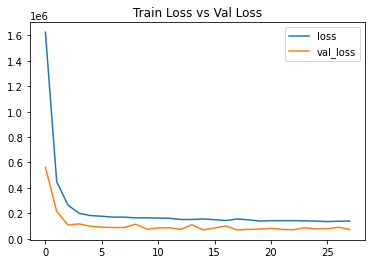

In [65]:
plt.plot(no_of_epochs, train_loss)
plt.plot(no_of_epochs, val_loss)

plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train Loss vs Val Loss')
plt.show()

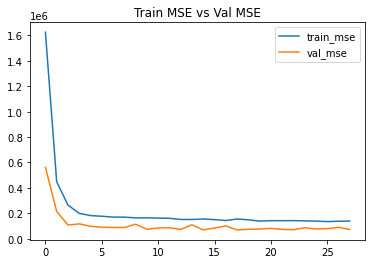

In [66]:
plt.plot(no_of_epochs, train_mse)
plt.plot(no_of_epochs, val_mse)

plt.legend(['train_mse', 'val_mse'], loc='upper right')
plt.title('Train MSE vs Val MSE')
plt.show()

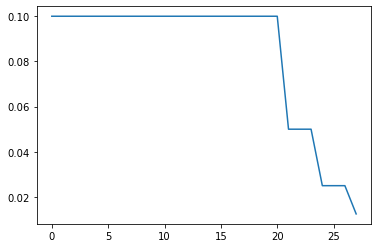

In [67]:
plt.plot(no_of_epochs, lr)
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
preds=fnn_model.predict(X_test)
mse=mean_squared_error(y_test,preds)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,preds)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

14/14 [==============================] - 0s 1ms/step
Mean Squared Error: 148839.97730898386
Root Mean Squared Error: 385.797845132634
Mean Absolute Error: 263.27130811934677
